In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare','Survived'])

In [3]:
df.sample(5)

,Survived,Age,Fare
121,0,NaN,8.0500
126,0,NaN,7.7500
544,0,50.0,106.4250
534,0,30.0,8.6625
513,1,54.0,59.4000


In [4]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_800\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [5]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
x = df[['Age','Fare']]
y = df['Survived']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state=0)
x_train.shape

(623, 2)

C:\Users\user\AppData\Local\Temp\ipykernel_800\174808551.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'], kde= True)


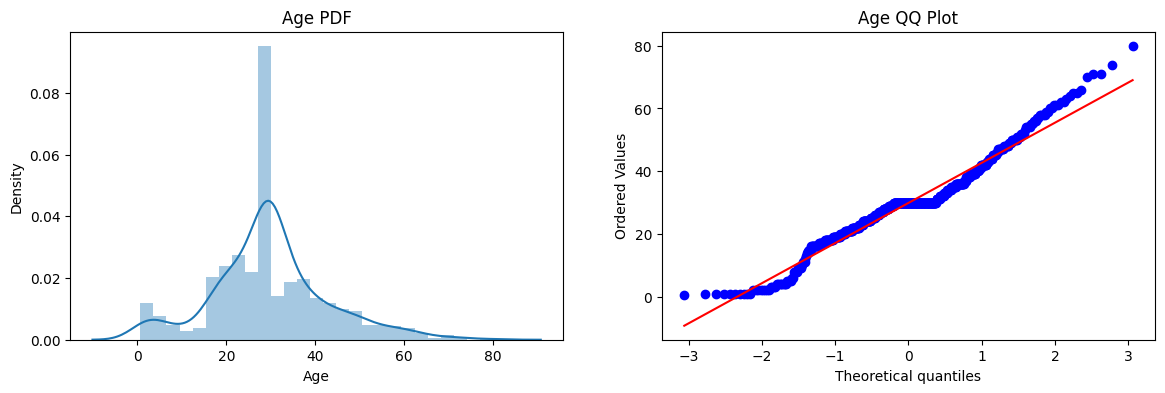

In [8]:

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'], kde= True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_800\2344542623.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


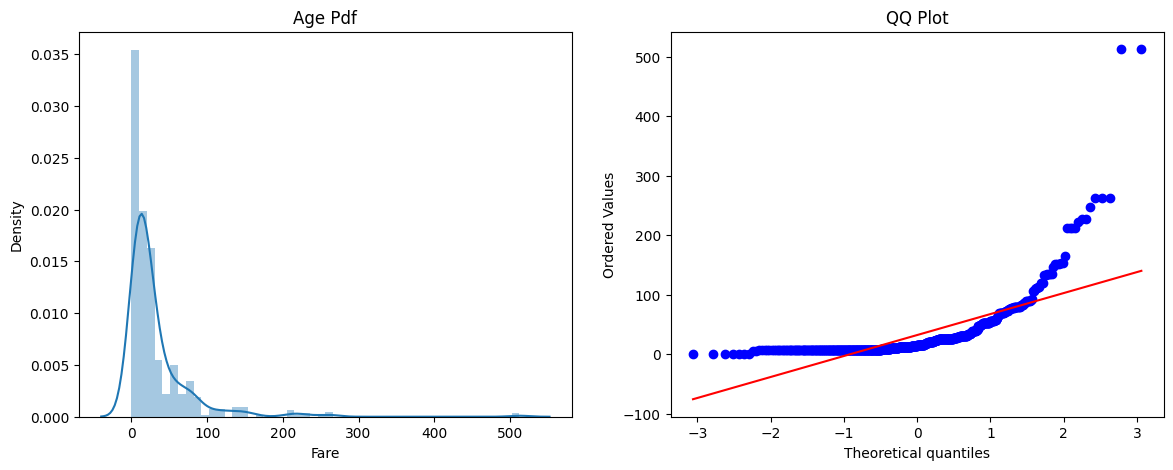

In [9]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Age Pdf')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title('QQ Plot')

plt.show()

Accuracy For Logistic and Decision Tree

In [10]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [11]:
clf.fit(x_train, y_train)
clf2.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)

print('Accuracy LR', accuracy_score(y_test, y_pred))
print('Accuracy DT', accuracy_score(y_test, y_pred1))

Accuracy LR 0.6865671641791045
Accuracy DT 0.664179104477612


Uses Log transforms

In [12]:
trf = FunctionTransformer(func=np.log1p)

In [13]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [14]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [15]:
clf.fit(x_train_transformed, y_train)
clf2.fit(x_train_transformed, y_train)

y_pred = clf.predict(x_test_transformed)
y_pred1 = clf.predict(x_test_transformed)

print('LR', accuracy_score(y_test, y_pred))
print('DT',accuracy_score(y_test, y_pred1))

LR 0.7126865671641791
DT 0.7126865671641791


Cross validation check

In [16]:
X_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6599625468164795


Use another Function Transfomer (Recipocal, squre, squreroot)

In [25]:
def apply_transform(transform):
    x = df.drop(columns=['Survived'])
    y = df['Survived']

    trf = ColumnTransformer([
        ('log', FunctionTransformer(transform), ['Fare'])
    ],remainder='passthrough')

    x_transform = trf.fit_transform(x)

    clf = LogisticRegression()

    print('Accuracy', np.mean(cross_val_score(clf, x_transform,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(x['Fare'], dist='norm', plot=plt)
    plt.title('Before transform')

    plt.subplot(122)
    stats.probplot(x_transform[:,0], dist='norm', plot=plt)
    plt.title('After transform')

    plt.show()

Accuracy 0.6431335830212235


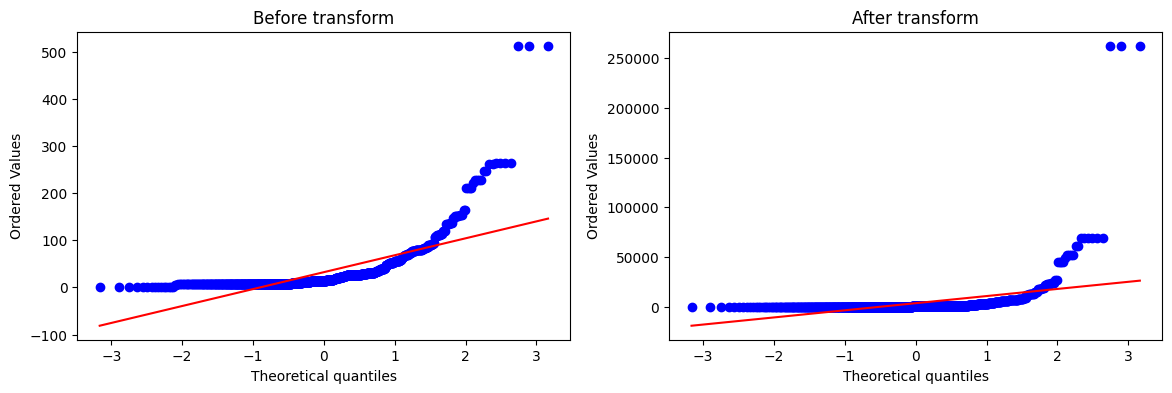

In [29]:
apply_transform(lambda x: x**2)